<a href="https://colab.research.google.com/github/chasubeen/ESAA_8th_OB/blob/Week_1/%EB%B6%84%EB%A5%98_%EC%97%B0%EC%8A%B5%EB%AC%B8%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **| 분류 연습 문제**
___
출처 : 핸즈온 머신러닝 Ch03 분류 연습문제 1, 2번

In [1]:
# import data

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version = 1, as_frame = False)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [2]:
X, y = mnist["data"], mnist["target"]

In [20]:
# 데이터 분리

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

### **1. MNIST 데이터셋으로 분류기를 만들어 테스트 세트에서 97% 정확도를 달성해보세요.**
___

1. `KNeghtborsClassifier`를 사용하는 것을 추천합니다.
2. `weights`와 `n_neighbors` 하이퍼 파라미터로 그리드 탐색을 시도하여, 좋은 하이퍼 파라미터 값을 찾아보세요.

In [21]:
# import package

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [22]:
# 파라미터 범위 설정

param_grid = {
    'n_neighbors': [3, 5],  # 이웃의 수
    'weights': ['uniform', 'distance']  # 가중치 설정
}

# 모델 객체 생성
knn_clf = KNeighborsClassifier()

# 교차 검증
grid_search = GridSearchCV(knn_clf, param_grid, cv = 5, verbose = 3)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ....n_neighbors=3, weights=uniform;, score=0.972 total time=  33.9s
[CV 2/5] END ....n_neighbors=3, weights=uniform;, score=0.971 total time=  32.9s
[CV 3/5] END ....n_neighbors=3, weights=uniform;, score=0.969 total time=  33.7s
[CV 4/5] END ....n_neighbors=3, weights=uniform;, score=0.969 total time=  33.7s
[CV 5/5] END ....n_neighbors=3, weights=uniform;, score=0.970 total time=  33.6s
[CV 1/5] END ...n_neighbors=3, weights=distance;, score=0.972 total time=  33.7s
[CV 2/5] END ...n_neighbors=3, weights=distance;, score=0.972 total time=  32.9s
[CV 3/5] END ...n_neighbors=3, weights=distance;, score=0.970 total time=  33.4s
[CV 4/5] END ...n_neighbors=3, weights=distance;, score=0.970 total time=  33.4s
[CV 5/5] END ...n_neighbors=3, weights=distance;, score=0.971 total time=  32.5s
[CV 1/5] END ....n_neighbors=5, weights=uniform;, score=0.970 total time=  33.6s
[CV 2/5] END ....n_neighbors=5, weights=uniform;,

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5],
                         'weights': ['uniform', 'distance']},
             verbose=3)

In [23]:
# best hyperparameter

grid_search.best_params_

{'n_neighbors': 3, 'weights': 'distance'}

In [24]:
## best score
# default: 정확도

grid_search.best_score_

0.9711166666666665

In [25]:
# model test

from sklearn.metrics import accuracy_score

y_pred = grid_search.predict(X_test) # 예측
accuracy_score(y_test, y_pred) # 평가

0.9717

### **2. 다음 단계를 따라 인위적으로 훈련 세트를 늘리는 데이터 증식 또는 훈련 세트 확장 기법을 연습해봅시다.**
___

#### **STEP 1. MNIST 이미지를 (왼, 오른, 위, 아래) 어느 방향으로든 한 픽셀 이동시킬 수 있는 함수를 만들어 보세요.**

In [26]:
from scipy.ndimage.interpolation import shift # 이미지의 픽셀을 이동하기 위한 모듈

<ipython-input-26-41f18ddc74a6>:1: DeprecationWarning: Please use `shift` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  from scipy.ndimage.interpolation import shift # 이미지의 픽셀을 이동하기 위한 모듈


In [27]:
def img_shift(img, dir): # 이미지, 이동 방향
  img = img.reshape((28, 28)) # 28 by 28 이미지로 resizing
  if dir == 'left': # 왼쪽
    img = shift(img, [0, -1], cval = 0)
  elif dir == 'right': # 오른쪽
    img = shift(img, [0, 1], cval = 0)
  elif dir == 'up': # 오른쪽
    img = shift(img, [-1, 0], cval = 0)
  elif dir == 'down': # 오른쪽
    img = shift(img, [1, 0], cval = 0)
  else:
    raise ValueError("잘못된 방향입니다. 'left', 'right', 'up', 'down' 중 하나를 선택하세요.")

  return img.reshape([-1]) # 1차원으로 다시 펼쳐서

In [28]:
## 아무 이미지로 테스트 해보기
# 0번 이미지로 실험

img = X_train[0]

# 이미지 가공
img_left = img_shift(img, 'left')
img_right = img_shift(img, 'right')
img_up = img_shift(img, 'up')
img_down = img_shift(img, 'down')

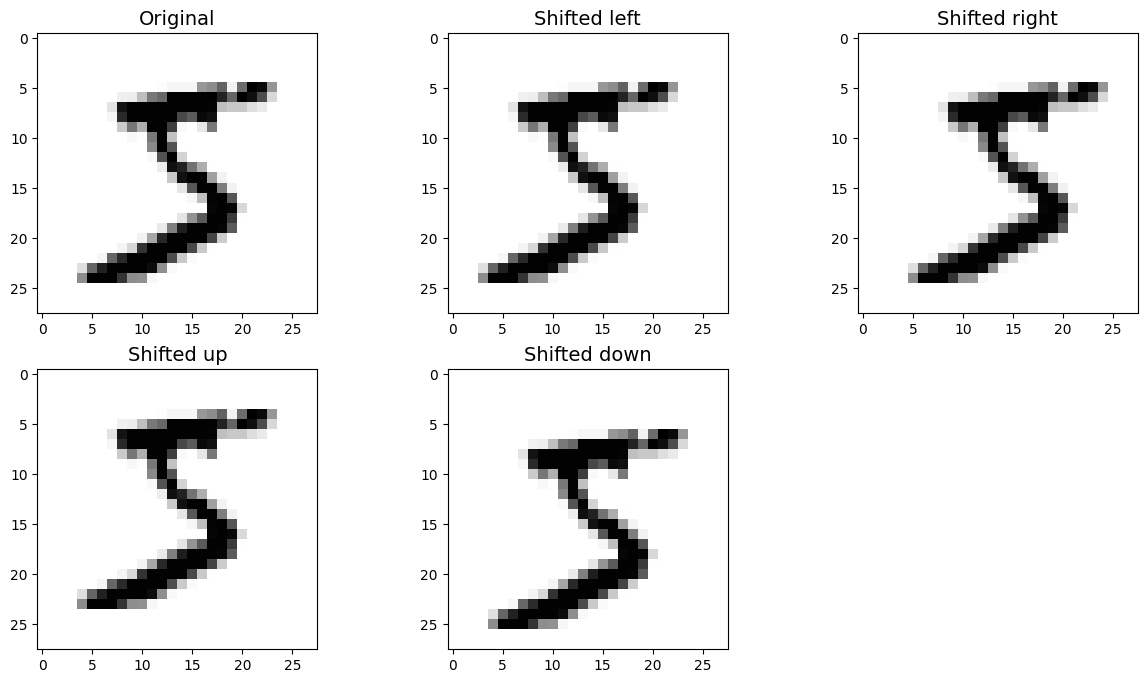

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize = (15, 8))

# 원본 이미지
plt.subplot(231)
plt.title("Original", fontsize=14)
plt.imshow(img.reshape(28,28), interpolation="nearest", cmap="Greys")

# 왼쪽으로 이동한 이미지
plt.subplot(232)
plt.title("Shifted left", fontsize=14)
plt.imshow(img_left.reshape(28, 28), interpolation="nearest", cmap="Greys")

# 오른쪽으로 이동한 이미지
plt.subplot(233)
plt.title("Shifted right", fontsize=14)
plt.imshow(img_right.reshape(28, 28), interpolation="nearest", cmap="Greys")

# 위로 이동한 이미지
plt.subplot(234)
plt.title("Shifted up", fontsize=14)
plt.imshow(img_up.reshape(28, 28), interpolation="nearest", cmap="Greys")

# 아래로 이동한 이미지
plt.subplot(235)
plt.title("Shifted down", fontsize=14)
plt.imshow(img_down.reshape(28, 28), interpolation="nearest", cmap="Greys")

plt.show()

####  **STEP 2. 앞에서 만든 함수를 이용하여, 훈련 세트에 있는 각 이미지에 대해 네 개의 이동된 복사본(방향마다 한 개씩)을 만들어 훈련 세트에 추가하세요**

In [31]:
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

for dir in ['left', 'right', 'up', 'down']:
  for image, label in zip(X_train, y_train):
    X_train_augmented.append(img_shift(img, dir))
    y_train_augmented.append(label)

In [35]:
import numpy as np

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

####  **STEP 3. 위에서 확장한 데이터셋을 이용하여, 1번 문제에서 찾은 최적 모델을 훈련시키고, 테스트 세트에서 정확도를 측정해보세요**

In [39]:
knn_best = KNeighborsClassifier(**grid_search.best_params_) # 딕셔너리 내 최적 파라미터만 가져오기

In [40]:
knn_best.fit(X_train_augmented, y_train_augmented) # 학습

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [41]:
y_pred = knn_best.predict(X_test) # 예측
accuracy_score(y_test, y_pred) # 평가

0.9717

- 성능 차이는 그닥...^^